In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("sample_data/mall_customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={"Annual Income (k$)" : "Income", "Spending Score (1-100)" : "Score"}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Score']])
df['Score'] = scaler.transform(df[['Score']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [ ]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918
196,197,Female,45,0.909836,0.275510
197,198,Male,32,0.909836,0.744898
198,199,Male,32,1.000000,0.173469


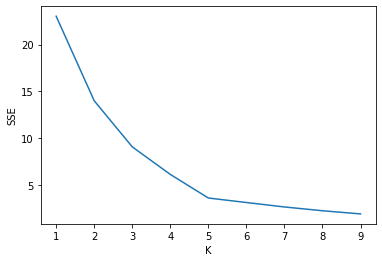

In [ ]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Income', 'Score']])
  sse.append(km.inertia_)

sns.lineplot(x='K', y='SSE', data=pd.DataFrame({'K': k_rng, 'SSE': sse }))

In [ ]:
km = KMeans(n_clusters=5)
y_predict = km.fit_predict(df[['Income', 'Score']])
y_predict

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
df['Cluster'] = y_predict
df.head()

,CustomerID,Gender,Age,Income,Score,Cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,3


In [ ]:
df_segm_analysis = df[['Income', 'Score']].groupby(df.Cluster).mean()
df_segm_analysis

,Income,Score
Cluster,,
0,0.087928,0.799629
1,0.586381,0.827839
2,0.600000,0.164431
3,0.092659,0.203194
4,0.330298,0.495087


In [ ]:
df['Labels'] = df['Cluster'].map({
    0:"Loyal",
    1:"netral",
    2:"pelit",
    3:"irit",
    4:"cukup"
})
df

,CustomerID,Gender,Age,Income,Score,Cluster,Labels
0,1,Male,19,0.000000,0.387755,3,irit
1,2,Male,21,0.000000,0.816327,0,Loyal
2,3,Female,20,0.008197,0.051020,3,irit
3,4,Female,23,0.008197,0.775510,0,Loyal
4,5,Female,31,0.016393,0.397959,3,irit
...,...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,1,netral
196,197,Female,45,0.909836,0.275510,2,pelit
197,198,Male,32,0.909836,0.744898,1,netral
198,199,Male,32,1.000000,0.173469,2,pelit


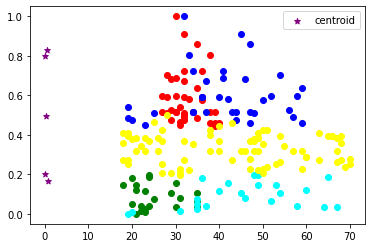

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]

plt.scatter(df1.Age, df1.Income, color="green") # loyal (0)
plt.scatter(df2.Age, df2.Income, color="red") # netral (1)
plt.scatter(df3.Age, df3.Income, color="blue") # Pelit (2)
plt.scatter(df4.Age, df4.Income, color="cyan") # irit (3)
plt.scatter(df5.Age, df5.Income, color="yellow") # Cukup (4)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend()

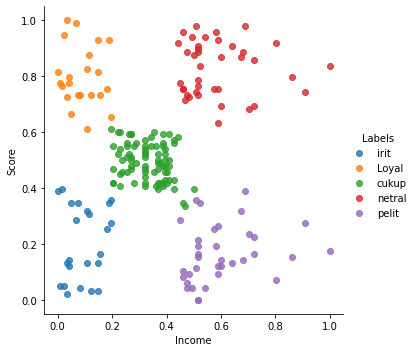

In [ ]:
sns.lmplot(x="Income", y="Score", data=df, fit_reg=False, hue="Labels")
plt.show()

In [ ]:
# Evaluasi
# import sklearn.metrics as sm
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(df['Cluster'], km.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        81

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
import pickle
filename = "sample_data/brain_user1_mall.sav"
pickle.dump(km, open(filename, "wb"))

In [ ]:
kmeans = pickle.load(open(filename, "rb"))
kmeans

KMeans(n_clusters=5)

In [ ]:
x_test = [[0.2, 0.7]]
# prediction
prediction = kmeans.predict(x_test)
print("Predict: ", prediction)

Predict:  [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
